In [1]:
from scipy.io import arff
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
#to split data for train and test
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import RANSACRegressor
#(RANdom SAmple Consensus) algorithm.~rastgele örneklerin benzerliği üstüne-robust
from sklearn.linear_model import TheilSenRegressor
#Theil-Sen Estimator: robust multivariate regression model-çok değişkenli regresyon modeli
#from sklearn.linear_model import SGDRegressor
#SGD's results are terrible. So commented them.
import matplotlib.pyplot as plt
#visualization
import seaborn as sns
#another visiualization
from sklearn import metrics
#to see memory usage

In [2]:
#couldnt get it done in loop so did it one by one
#i=0
#while i<10:
#    data[i]=arff.loadarff([i]+'.arff')
#    df[i]=pd.DataFrame(data[i][0])
#    i+=1

data0=arff.loadarff('0.arff')
df0=pd.DataFrame(data0[0])
data1=arff.loadarff('1.arff')
df1=pd.DataFrame(data1[0])
data2=arff.loadarff('2.arff')
df2=pd.DataFrame(data2[0])
data3=arff.loadarff('3.arff')
df3=pd.DataFrame(data3[0])
data4=arff.loadarff('4.arff')
df4=pd.DataFrame(data4[0])
data5=arff.loadarff('5.arff')
df5=pd.DataFrame(data5[0])
data6=arff.loadarff('6.arff')
df6=pd.DataFrame(data6[0])
data7=arff.loadarff('7.arff')
df7=pd.DataFrame(data7[0])
data8=arff.loadarff('8.arff')
df8=pd.DataFrame(data8[0])
data9=arff.loadarff('9.arff')
df9=pd.DataFrame(data9[0])


In [3]:
frames=[df1, df2, df3, df4, df5, df6, df7, df8, df9] #geçici dfleri list halinde frame'e atıyoruz
df=pd.concat(frames, ignore_index=True) #bu framelerden son olarak bütün dataları içeren df'i oluşturuyoruz

In [4]:
df

,pred_Activity,peakCount,Z_breathRate,Z_heartRate,Z_skinTemp,SW_GSR,SW_NearBodyTemp,SW_skinTemp,cosmed
0,b'lying',92.0,16.490182,48.969195,10.0,10.097270,10.747776,11.063158,1.803177
1,b'lying',81.0,16.790604,52.888637,10.0,10.097270,10.747776,11.063158,2.121443
2,b'walking',97.0,16.733168,56.625628,10.0,10.097270,10.747776,11.063158,3.184779
3,b'walking',111.0,15.728140,54.393795,10.0,10.097270,10.747776,11.063158,2.327770
4,b'walking',100.0,12.135302,49.127372,10.0,10.097270,10.747776,11.063158,2.195212
...,...,...,...,...,...,...,...,...,...
5317,b'running',78.0,30.801074,115.630183,8.0,12.059786,12.760415,13.764971,8.034513
5318,b'running',64.0,27.077697,114.928049,8.0,12.059786,12.760415,13.764971,8.611814
5319,b'running',66.0,26.460689,116.620075,9.0,12.059786,12.760415,13.764971,8.115253
5320,b'running',60.0,26.375527,111.890192,9.0,12.059786,12.760415,13.764971,8.331000


In [5]:
df['pred_Activity'] = df['pred_Activity'].str.decode('utf-8')
#no error for multilanguage

In [6]:
df.cosmed.min()

0.252066

In [7]:
df.pred_Activity.value_counts()#spesifik kolunda neyden kaç tane var

lying               1141
sitting              821
walking              803
standing             710
cycling              489
kneeling             373
allfours             371
standing_leaning     220
running              208
transition           186
Name: pred_Activity, dtype: int64

In [8]:
dummies = pd.get_dummies(df.pred_Activity, drop_first=True)
#one hot encoding, drop_first true ile gereksiz 1 sütundan kurtuluyoruz

In [9]:
dummies

,cycling,kneeling,lying,running,sitting,standing,standing_leaning,transition,walking
0,0,0,1,0,0,0,0,0,0
1,0,0,1,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,1
3,0,0,0,0,0,0,0,0,1
4,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...
5317,0,0,0,1,0,0,0,0,0
5318,0,0,0,1,0,0,0,0,0
5319,0,0,0,1,0,0,0,0,0
5320,0,0,0,1,0,0,0,0,0


In [10]:
df.drop('pred_Activity',axis=1,inplace=True)
#dismiss the non number values

In [11]:
df=df.join(dummies)
#use these numeric values instead of those not

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5322 entries, 0 to 5321
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   peakCount         5322 non-null   float64
 1   Z_breathRate      5322 non-null   float64
 2   Z_heartRate       5322 non-null   float64
 3   Z_skinTemp        5322 non-null   float64
 4   SW_GSR            5322 non-null   float64
 5   SW_NearBodyTemp   5322 non-null   float64
 6   SW_skinTemp       5322 non-null   float64
 7   cosmed            5322 non-null   float64
 8   cycling           5322 non-null   uint8  
 9   kneeling          5322 non-null   uint8  
 10  lying             5322 non-null   uint8  
 11  running           5322 non-null   uint8  
 12  sitting           5322 non-null   uint8  
 13  standing          5322 non-null   uint8  
 14  standing_leaning  5322 non-null   uint8  
 15  transition        5322 non-null   uint8  
 16  walking           5322 non-null   uint8  


In [13]:
df.describe()

,peakCount,Z_breathRate,Z_heartRate,Z_skinTemp,SW_GSR,SW_NearBodyTemp,SW_skinTemp,cosmed,cycling,kneeling,lying,running,sitting,standing,standing_leaning,transition,walking
count,5322.000000,5322.000000,5322.000000,5322.000000,5322.000000,5322.000000,5322.000000,5322.000000,5322.000000,5322.000000,5322.000000,5322.000000,5322.000000,5322.000000,5322.000000,5322.000000,5322.000000
mean,67.191281,16.184407,52.714605,10.460376,10.236605,10.362160,10.802736,2.871644,0.091883,0.070086,0.214393,0.039083,0.154265,0.133408,0.041338,0.034949,0.150883
std,39.610145,6.950643,24.589749,0.781704,0.454538,0.988507,0.911089,2.120833,0.288888,0.255317,0.410439,0.193811,0.361237,0.340048,0.199089,0.183669,0.357969
min,0.000000,2.978526,16.470771,8.000000,9.909891,7.291151,9.178588,0.252066,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,39.000000,10.931264,33.892015,10.000000,9.997848,9.635023,10.127249,1.268516,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,84.000000,14.842876,47.273752,10.206243,10.066470,10.454214,10.639629,2.043793,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,99.000000,20.427898,65.945047,11.000000,10.233255,10.891589,11.260191,3.851824,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,126.000000,37.824698,131.489297,12.000000,12.371005,12.825198,14.018766,10.732107,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [14]:
a = df[["peakCount","Z_breathRate","Z_heartRate","Z_skinTemp","cycling","kneeling","lying","running","sitting","standing","standing_leaning","transition","walking"]]
#taking datas except the one we will get with regression, cosmed.

In [15]:
x_train, x_test, y_train, y_test = train_test_split(a, df["cosmed"], test_size=0.33)
#we can change test_size due to project requirements, also random_state=(int) can be added for multiwork

In [16]:
x_train

,peakCount,Z_breathRate,Z_heartRate,Z_skinTemp,cycling,kneeling,lying,running,sitting,standing,standing_leaning,transition,walking
122,113.0,13.147652,61.527237,11.000000,0,0,0,0,1,0,0,0,0
2082,42.0,16.206171,41.236200,10.721663,0,0,1,0,0,0,0,0,0
1826,101.0,18.473745,34.833753,11.721663,0,1,0,0,0,0,0,0,0
1332,8.0,9.843646,18.000000,10.000000,0,0,1,0,0,0,0,0,0
3318,84.0,17.388034,39.489433,10.000000,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3079,0.0,10.219275,28.644618,11.000000,0,0,1,0,0,0,0,0,0
3192,102.0,12.035416,31.872090,10.002198,0,1,0,0,0,0,0,0,0
1663,0.0,10.748121,29.857516,9.721663,0,0,1,0,0,0,0,0,0
685,96.0,11.767304,42.717837,10.206243,0,0,0,0,0,1,0,0,0


In [17]:
x_test

,peakCount,Z_breathRate,Z_heartRate,Z_skinTemp,cycling,kneeling,lying,running,sitting,standing,standing_leaning,transition,walking
5103,98.0,19.460120,56.314732,10.000000,0,0,0,0,0,0,0,0,1
2561,0.0,9.378079,40.459292,11.000000,0,0,0,0,0,0,0,0,0
535,19.0,11.494352,26.447051,9.206243,0,0,1,0,0,0,0,0,0
2215,95.0,22.893257,53.274799,10.721663,0,0,0,0,0,0,0,0,1
1742,93.0,8.535356,34.138179,10.721663,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3963,83.0,17.247295,18.000000,12.000000,0,0,0,0,1,0,0,0,0
699,97.0,13.233108,42.390713,10.206243,0,0,0,0,0,1,0,0,0
1048,81.0,19.491228,72.715344,9.206243,1,0,0,0,0,0,0,0,0
3592,73.0,23.726055,54.139327,10.000000,0,0,0,0,0,0,0,0,1


In [18]:
lm=LinearRegression()
ran=RANSACRegressor()
theil=TheilSenRegressor()
#sgd=SGDRegressor()


In [19]:
lm.fit(x_train,y_train)

LinearRegression()

In [20]:
ran.fit(x_train, y_train)

RANSACRegressor()

In [21]:
theil.fit(x_train, y_train)

TheilSenRegressor(max_subpopulation=10000)

In [22]:
#sgd.fit(x_train, y_train)

In [23]:
predictlm=lm.predict(x_test)
predictran=ran.predict(x_test)
predicttheil=theil.predict(x_test)
#predictsgd=sgd.predict(x_test)

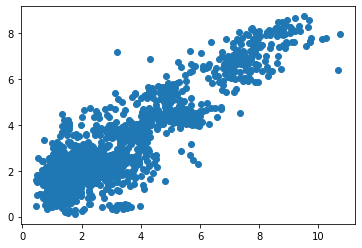

In [24]:
plt.scatter(y_test,predictlm)

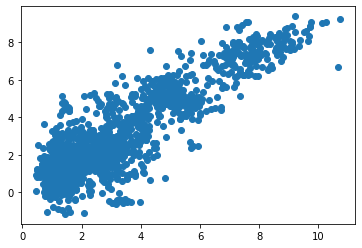

In [25]:
plt.scatter(y_test,predictran)

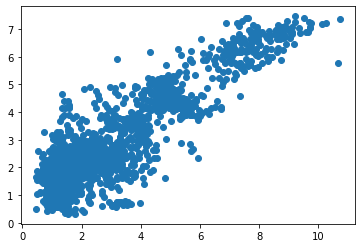

In [26]:
plt.scatter(y_test,predicttheil)

In [27]:
#plt.scatter(y_test,predictsgd)

C:\Users\BahaD\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='cosmed', ylabel='Density'>

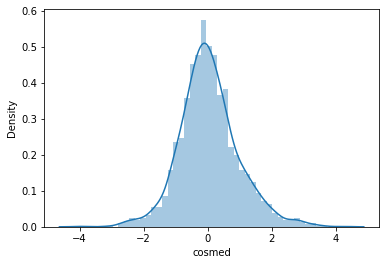

In [28]:
sns.distplot((y_test-predictlm))
#shows that predict is very good but its not a perf metric

C:\Users\BahaD\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='cosmed', ylabel='Density'>

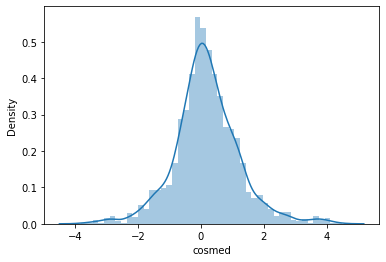

In [29]:
sns.distplot((y_test-predictran))

C:\Users\BahaD\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='cosmed', ylabel='Density'>

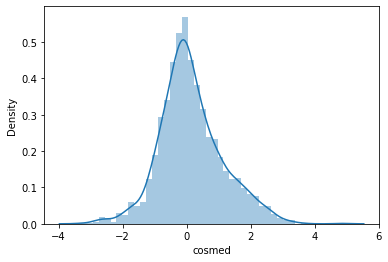

In [30]:
sns.distplot((y_test-predicttheil))

In [31]:
#sns.distplot((y_test-predictsgd))

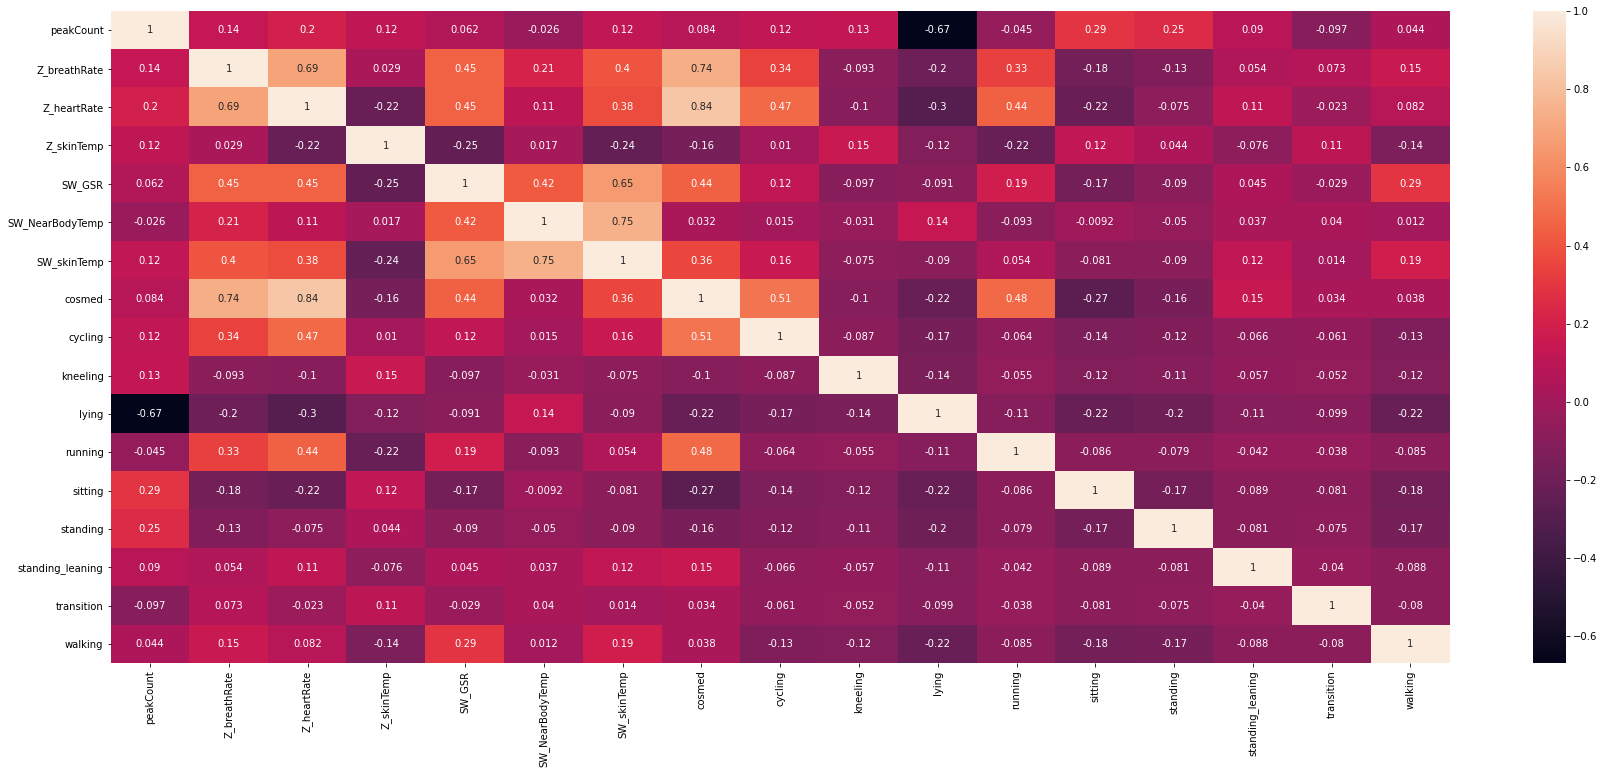

In [32]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(30,12))
corr_map = sns.heatmap(df.corr(),annot=True)

#df.corr()
#corr matrix. +1 show that they are parallel datas but might not show causality

In [33]:
df.memory_usage(deep=True)
#be sure that there is not and wont be any memory problem

Index                 128
peakCount           42576
Z_breathRate        42576
Z_heartRate         42576
Z_skinTemp          42576
SW_GSR              42576
SW_NearBodyTemp     42576
SW_skinTemp         42576
cosmed              42576
cycling              5322
kneeling             5322
lying                5322
running              5322
sitting              5322
standing             5322
standing_leaning     5322
transition           5322
walking              5322
dtype: int64

In [34]:
metrics.mean_absolute_error(y_test,predictlm)

0.6973734879688431

In [35]:
metrics.mean_absolute_error(y_test,predictran)

0.76636384402989

In [36]:
metrics.mean_absolute_error(y_test,predicttheil)

0.747424590620317

In [37]:
#metrics.mean_absolute_error(y_test,predictsgd)

In [38]:
df.cosmed.describe()

count    5322.000000
mean        2.871644
std         2.120833
min         0.252066
25%         1.268516
50%         2.043793
75%         3.851824
max        10.732107
Name: cosmed, dtype: float64

In [39]:
metrics.mean_squared_error(y_test, predictlm)

0.8695443514724247

In [40]:
metrics.mean_squared_error(y_test, predictran)

1.1190319237548496

In [41]:
metrics.mean_squared_error(y_test, predicttheil)

1.0048814501291858

In [42]:
np.sqrt(metrics.mean_squared_error(y_test,predictlm))

0.932493620070628

In [43]:
np.sqrt(metrics.mean_squared_error(y_test,predictran))

1.057843052515282

In [44]:
np.sqrt(metrics.mean_squared_error(y_test,predicttheil))

1.0024377537429374

In [45]:
metrics.r2_score(y_test, predictlm)

0.8120326698098572

In [46]:
metrics.r2_score(y_test, predictran)

0.7581015358796119

In [47]:
metrics.r2_score(y_test, predicttheil)

0.7827771717238599

In [48]:
#metrics.r2_score(y_test, predictsgd)

In [49]:
y_test

5103    2.857101
2561    1.741393
535     1.555140
2215    2.050550
1742    1.379332
          ...   
3963    0.949089
699     1.816757
1048    4.991076
3592    4.108389
586     1.603498
Name: cosmed, Length: 1757, dtype: float64